# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Analysis of portfolio performance measures

In this notebook, you will learn about the different portfolio performance measures and how to code the same. The following different measures are covered in this notebook:

1. Annualised Returns
2. Annualised Volatility
3. Sharpe Ratio
4. Sortino Ratio
5. Beta
6. Treynor Ratio
7. Information Ratio
8. Skewness
9. Kurtosis
10. Maximum Drawdown

You will learn to calculate these measures on the strategy returns of multi-factor portfolio covered in the previous section.

## Import the libraries

In [1]:
# Importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import monthly_returns_heatmap as mrh
from tabulate import tabulate

# Need to import the matplotlib_converters from pandas,
# whenever you try to plot the columns of a dataframe using a for loop

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Import the Data

In [2]:
# Create a dataframe returns to store the returns of the portfolio
returns = pd.read_csv(
    '../data_modules/Returns_2012_To_2017_Portfolio_Analysis.csv', index_col=0)

# Convert the index to datetime format
returns.index = pd.to_datetime(returns.index)

returns.head()

,portfolio,market
Date,,
2012-01-03,0.000000,0.000188
2012-01-04,0.000000,0.002944
2012-01-05,0.000000,-0.002537
2012-01-06,0.000000,0.002262
2012-01-09,-0.003117,0.008886


## Annualised Returns

In [3]:
# The annual risk-free rate of 2% is assumed
risk_free_rate = 0.02

# Total number of trading days in a year is 252
trading_days = 252

# Calculate the average daily returns
average_daily_returns = returns['portfolio'].mean()

# Calculate the annual returns by multiplying average daily returns with number of trading days
annual_returns = ((1 + average_daily_returns)**(trading_days) - 1)*100

'The annualised returns are %.2f%%' % annual_returns

'The annualised returns are 3.65%'

### Annualised Volatility
The volatility is the standard deviation of the returns of the portfolio. Annualised Volatility can be calculated by multiplying the daily volatility with the square root of number of trading days in a year.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/0EdOjUVz/PA1.PNG)


In [4]:
# Calculate the daily standard deviation
daily_std_dev = returns['portfolio'].std()

# Calculate the annualised volatility
annual_volatility = daily_std_dev * np.sqrt(trading_days) * 100
'The annualised volatility is %.2f%%' % annual_volatility

'The annualised volatility is 6.98%'

### Sharpe Ratio
The Sharpe ratio is the excess return calculated as total returns less the risk-free rate of return per unit of volatility. Generally, risk-free return is the return on the risk-free assets such as government bonds. The excess returns are due to the 'extra risk' taken by the investor on investing in risky assets.

It tells whether the returns on a portfolio are due to good investment decision or the result of excessive risk taken. Higher Sharpe ratio is always preferable over the lower ones. 

The Sharpe Ratio can be used to compare the portfolio with the benchmark to get to know how your portfolio is repaying for the risk taken on the investment.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/ys4mgeBk/PA2.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_f $ = Risk-free Returns
<br>$ \sigma_p $ = Standard deviation of the portfolio returns

In [5]:
# Calculate the daily risk-free return by dividing the annual risk-free return by number of trading days
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns = returns['portfolio'] - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
# It is multiplied by square root of trading days to get the annualized value
sharpe_ratio = (excess_daily_returns.mean() /
                excess_daily_returns.std()) * np.sqrt(trading_days)
'The Sharpe ratio is %.2f' % sharpe_ratio

'The Sharpe ratio is 0.23'

### Sortino Ratio
In the Sortino ratio, the denominator of the Sharpe ratio, the total standard deviation is replaced with the downside deviation. The downside deviation is the standard deviation of negative asset return.

It differentiates the harmful volatility from the total volatility by using the standard deviation of negative returns only. Since an investor is concerned only about the downside volatility, Sortino ratio is a good measure in comparing the highly volatile portfolios whereas the Sharpe ratio is better at analyzing portfolios with low volatility. The probability of large loss will be low if the value of the Sortino ratio is high.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/bAlslhZL/PA3.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_f $ = Risk-free Returns
<br>$ \sigma_d $ = Standard deviation of the negative asset returns

In [6]:
# Define a variable net_returns to calculate daily returns subtracted by average daily returns
net_returns = returns['portfolio'] - average_daily_returns

# Define a variable negative_returns to keep only negative net_returns
negative_returns = net_returns[net_returns < 0]

# Calculate the standard deviation of negative returns by defining semi_dev variable
semi_dev = np.sqrt(np.sum((negative_returns**2))/len(returns))

# Calculate the Sortino ratio using the above-mentioned formula
# It is multiplied by the square root of trading days to get the annualized value
sortino_ratio = (excess_daily_returns.mean()/semi_dev) * np.sqrt(trading_days)
'The sortino ratio is %.2f' % sortino_ratio

'The sortino ratio is 0.32'

### Beta
The beta is used to capture the relationship between the portfolio returns and the market returns.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/YoH8EJ8W/PA4.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_m $ = Market Returns

In [7]:
# Calculate the covariance between market returns and portfolio returns
covariance_matrix = returns[['market', 'portfolio']].cov()
covariance_value = covariance_matrix.iloc[0]['portfolio']

# Calculate the market variance
market_variance = returns['market'].var()

# Calculate the beta value using the given formula
beta = covariance_value/market_variance
'The beta is %.2f' % beta

'The beta is 0.17'

### Treynor Ratio
Treynor Ratio is the variation in the denominator of the Sharpe ratio by replacing the total standard deviation with the beta of the portfolio. It also highlights the risk-adjusted performance of the portfolio. Higher the Treynor ratio, more suitable the investment is. The ratio is based on historical returns data, it is not necessary it will replicate in the future. The higher ratio tells that investment is good but it does not quantify how much good the investment is.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/Ds106Ffi/PA5.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_f $ = Risk-free Returns
<br>$ \beta_p $ = Portfolio's Beta

In [8]:
# Calculate the Treynor ratio using the above formula
# It is multiplied by trading days to get the annualized value
treynor_ratio = (excess_daily_returns.mean()*trading_days)/beta
'The treynor ratio is %.2f' % treynor_ratio

'The treynor ratio is 0.10'

### Information Ratio
Information ratio tells the portfolio's return in excess of the benchmark's return with respect to the volatility of these returns.  It tells an investor how much excess return is generated from the excess risk taken with respect to its benchmark. A Higher ratio implies that the fund is more consistent and better performing. The range between 0.4-0.6 is considered good and the value greater than 1 is considered excellent but is found quite rare.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/itfI2JQC/PA6.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_m $ = Market Returns
<br>$ \sigma_{p,m} $ = Standard deviation of the difference between portfolio and market returns

In [9]:
# Calculate the Treynor Ratio using the above formula
# It is multiplied by square root of trading days to get the annualized value
information_ratio = ((average_daily_returns - returns['market'].mean()) /
                     (returns['portfolio'] - returns['market']).std()) * np.sqrt(trading_days)
'The information raio is %.2f' % information_ratio

'The information raio is -0.79'

### Skewness
Skewness is the degree of distortion from the normal distribution. It can be either positive or negative. Positive skew means that the right tail is longer than the left tail and vice-versa for the negative kurtosis. It is important to determine the kurtosis as it better judges the likelihood of events falling in the tail of the distribution rather than focusing only on the average. A positively skewed investment in the portfolio indicates frequent small losses and few large gains while a negatively skewed investment implies frequent small gains and few large losses.

In [10]:
# Calculate the skewness using the skew() function
skewness = returns['portfolio'].skew()
'The skewness is %.2f' % skewness

'The skewness is 0.06'

### Kurtosis
Kurtosis, like skewness, is a measure of distribution. It explains how the tails of a given distribution differ from the tails of the normal distribution. It tells whether the tails of the distribution contain extreme values or not. Kurtosis tells about the heaviness in the tails while skewness tells about the symmetry.

Kurtosis can be mesokurtic, leptokurtic and platykurtic. Mesokurtic show the same extreme value characteristics as the normal distribution. Leptokurtic has positive excess distribution. This distribution has long tails and is more concentrated at the mean. Investment in this type of distribution is risky. The Platykurtic distribution shows negative excess distribution. Investment in this type of distribution is considered less risky.


In [11]:
# Calculate the excess kurtosis using the kurtosis() function
excess_kurtosis = returns['portfolio'].kurtosis()
'The kurtosis is %.2f' % excess_kurtosis

'The kurtosis is 4.63'

### Maximum Drawdown
Maximum Drawdown is a key measure to assess the risk possess by a given portfolio. It measures the peak-to-trough decline in the value of the portfolio and is quoted as the percentage of the peak value. The formula to calculate the Maximum Drawdown is:

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/Mn5OxlcB/PA7.PNG)

where,

$ P $ = Maximum value before the largest drop
<br>$ L $ = Lowest value before the new high

Maximum Drawdown only measures the size of the largest loss but it doesn't say how frequently the losses are occurring and how much time it took to recover from those losses. A low value of maximum drawdown is preferred as it indicates that losses from the investment in the portfolio are less. 

In [12]:
# Cumulative product of portfolio returns
cumprod_ret = (returns['portfolio']+1).cumprod()*100

# Cumulative product of market returns
cumprod_market_ret = (returns['market']+1).cumprod()*100

# Convert the index in datetime format
cumprod_ret.index = pd.to_datetime(cumprod_ret.index)

# Define a variable trough_index to store the index of lowest value before new high
trough_index = (np.maximum.accumulate(cumprod_ret) - cumprod_ret).idxmax()

# Define a variable peak_index to store the index of maximum value before largest drop
peak_index = cumprod_ret.loc[:trough_index].idxmax()

# Calculate the maximum drawdown using the given formula
maximum_drawdown = 100 * \
    (cumprod_ret[trough_index] - cumprod_ret[peak_index]) / \
    cumprod_ret[peak_index]
'The maximum drawdown is %.2f%%' % maximum_drawdown

'The maximum drawdown is -10.90%'

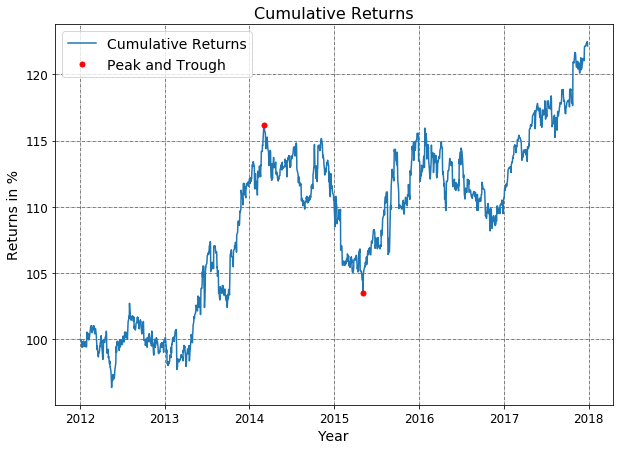

In [13]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Plot the cumulative product of returns
plt.plot(cumprod_ret)

# Plot to represent the peak and trough, represented by red dots.
plt.plot([peak_index, trough_index], [cumprod_ret[peak_index], cumprod_ret[trough_index]], 'o', color='r',
         markersize=5)

# Define the label for the title of the figure
plt.title("Cumulative Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Returns in %', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Define the label for the legend
plt.legend(["Cumulative Returns", "Peak and Trough"], fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

### Plot the running maximum drawdown

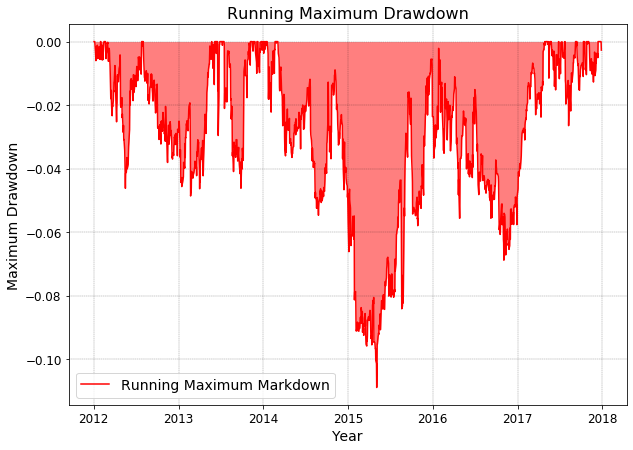

In [14]:
# Calculate the running maximum value for the cumulative returns
running_max = np.maximum.accumulate(cumprod_ret)

# Set value of the running_max to 1 if it is less than 1
running_max[running_max < 1] = 1

# Calculate the running maximum drawdown
running_max_drawdown = (cumprod_ret/running_max)-1

# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Plot the running maximum drawdown
plt.plot(running_max_drawdown, color='r')

# Define the label for the title of the figure
plt.title("Running Maximum Drawdown", fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel('Year', fontsize=14)
plt.ylabel('Maximum Drawdown', fontsize=14)

# Define the label for the legend
plt.legend(["Running Maximum Markdown"], fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)

# Fill the space between the plot
plt.fill_between(running_max_drawdown.index,
                 running_max_drawdown, alpha=0.5, color='r', linewidth=0)

plt.show()

### Plot the histogram of returns of the portfolio

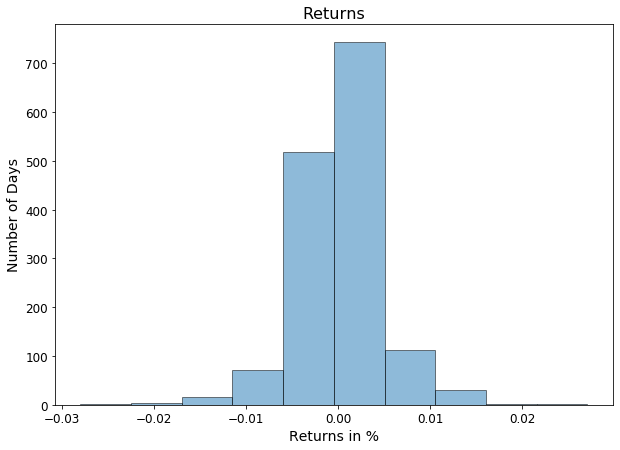

In [15]:
# Drop the NULL values for the histogram plot
returns.dropna(inplace=True)

# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Plot the histogram of returns of the portfolio
plt.hist(returns['portfolio'], histtype='bar', alpha=0.5, ec='black')

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel("Returns in %", fontsize=14)
plt.ylabel("Number of Days", fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Plot the heatmap of monthly returns of the portfolio vs year

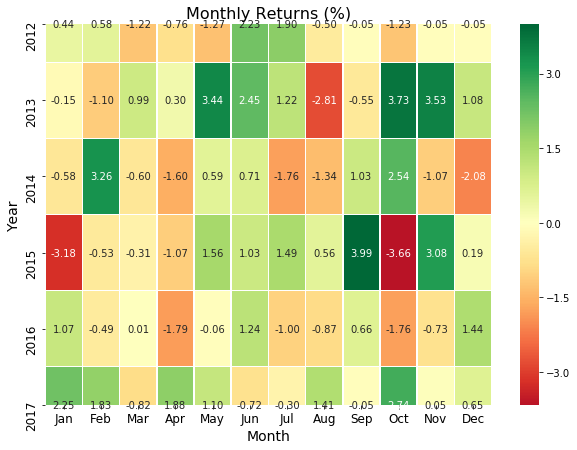

In [16]:
# Average monthly returns of the portfolio
portfolio_monthly_mean = returns.resample('M').mean()

# Total count of each month
portfolio_monthly_count = returns.resample('M').count()

# Calculation of monthly returns of the portfolio
portfolio_monthly_ret = (portfolio_monthly_mean +
                         1)**(portfolio_monthly_count) - 1

# Heatmap of monthly returns of portfolio vs year
mrh.plot(portfolio_monthly_ret['portfolio'], figsize=(10, 7))

# Define the label for the title of the figure
plt.title('Monthly Returns (%)', fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Plot the cumulative returns of the portfolio vs S&P500 

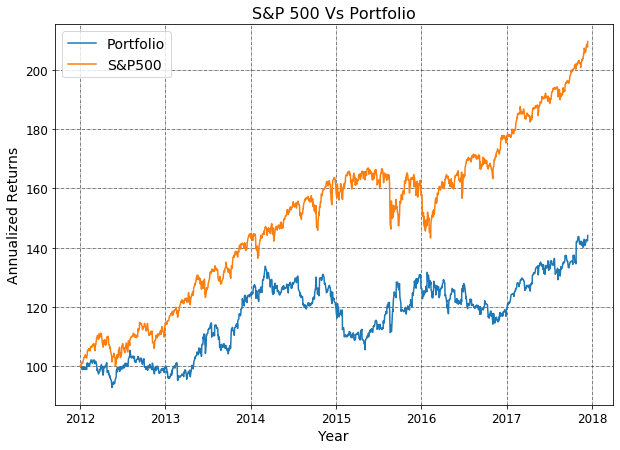

In [17]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Here we have multiplied returns by a factor of 2 as we can take the leverage of 2.
cumprod_ret_leverage_2 = (returns['portfolio']*2+1).cumprod()*100

# Plot the cumulative product of portfolio returns
plt.plot(cumprod_ret_leverage_2, label='Portfolio')

# Plot the cumulative product of market(S&P500) returns
plt.plot(cumprod_market_ret, label='S&P500')

# Define the label for the title of the figure
plt.title("S&P 500 Vs Portfolio", fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel("Year", fontsize=14)
plt.ylabel("Annualized Returns", fontsize=14)

# Define the label for the legend
plt.legend(["Portfolio", "S&P500"], fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

### Tabulate all the values calculated

In [18]:
# Form a table to get the values of all risk measures in structured manner
table = pd.DataFrame({'Parameters': ['Annual Returns', 'Annual Volatility', 'Sharpe Ratio', 'Sortino Ratio',
                                     'Beta', 'Treynor Ratio', 'Information Ratio', 'Skewness', 'Kurtosis',
                                     'Maximum Drawdown'],
                      'Value': [annual_returns, annual_volatility, sharpe_ratio, sortino_ratio, beta,
                                treynor_ratio, information_ratio, skewness, excess_kurtosis, maximum_drawdown]})

print(tabulate(table, headers='keys', tablefmt='psql'))

+----+-------------------+-------------+
|    | Parameters        |       Value |
|----+-------------------+-------------|
|  0 | Annual Returns    |   3.64959   |
|  1 | Annual Volatility |   6.98062   |
|  2 | Sharpe Ratio      |   0.227032  |
|  3 | Sortino Ratio     |   0.324121  |
|  4 | Beta              |   0.165704  |
|  5 | Treynor Ratio     |   0.0956417 |
|  6 | Information Ratio |  -0.792269  |
|  7 | Skewness          |   0.0591578 |
|  8 | Kurtosis          |   4.63483   |
|  9 | Maximum Drawdown  | -10.8978    |
+----+-------------------+-------------+


In the next unit, you will practice the calculations of these performance measures.
<BR><BR>